Question 1: 

Eigen Values
 [[ 0.01447815 -0.21534345]
 [-0.08829337 -0.40181854]
 [-0.16398584 -0.27405584]
 [-0.05035686 -0.00509032]
 [-0.34025534 -0.37641963]
 [-0.47580712 -0.50488797]
 [-0.55720747  0.39970198]
 [-0.55670568  0.4008382 ]]


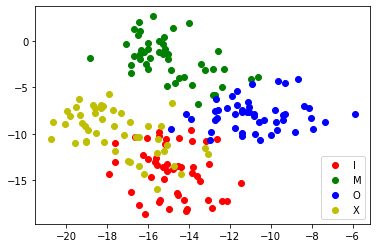

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "class"]
IMOXdata=pd.read_table('http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/imox_data.txt', delim_whitespace=True, header=None, names=columns )
#IMOXdata.head(5)

#Calculating PCA for IMOX data

IMOX1=pd.DataFrame(IMOXdata)
IMOX1[1:8]
cols=[0, 1, 2, 3, 4, 5, 6, 7]
IMOX=IMOX1[IMOX1.columns[cols]]
mean=IMOX.mean(axis=0)
CovarianceMatrix=IMOX-mean

eigenValue,eigenVector = np.linalg.eigh(CovarianceMatrix.cov()) 
eigenVector1 = eigenVector.T[-2:]

print("Eigen Values\n",eigenVector1.T)


col = eigenVector1.dot(np.array(IMOX).T).T
colclas = [('r', 'I'), ('g', 'M'), ('b', 'O'), ('y', 'X')]
for i, (c, l) in zip(range(0, 192, 48), colclas):
    x,y = zip(*col[i:i+48])
    plt.scatter(x,y, c=c, label=l)
    
plt.legend(loc=4)

MDA values
 [[-0.02777376 -0.14559615]
 [ 0.05627064 -0.28838842]
 [ 0.03343881 -0.19559306]
 [-0.02140369 -0.01736432]
 [-0.09079361 -0.56288346]
 [ 0.00710335 -0.72430432]
 [-0.52122203 -0.08912887]
 [-0.84529262  0.0876198 ]]


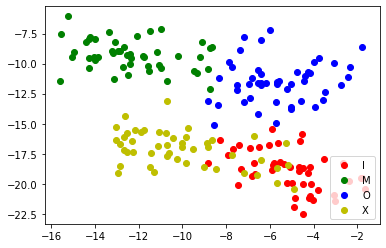

In [84]:
#Question-1 Part-B


cols=[0, 1, 2, 3, 4, 5, 6, 7]

IMOXclass1=IMOXdata[IMOXdata['class']==1]
IMOXclass1=IMOXclass1[IMOXclass1.columns[cols]]

IMOXclass2=IMOXdata[IMOXdata['class']==2]
IMOXclass2=IMOXclass2[IMOXclass2.columns[cols]]


IMOXclass3=IMOXdata[IMOXdata['class']==3]
IMOXclass3=IMOXclass1[IMOXclass3.columns[cols]]


IMOXclass4=IMOXdata[IMOXdata['class']==4]
IMOXclass4=IMOXclass1[IMOXclass4.columns[cols]]



class1Mean=IMOXclass1.mean()
covarClass1=IMOXclass1-class1Mean

class2Mean=IMOXclass2.mean()
covarClass2=IMOXclass2-class2Mean

class3Mean=IMOXclass3.mean()
covarClass3=IMOXclass3-class3Mean

class4Mean=IMOXclass4.mean()
covarClass4=IMOXclass4-class4Mean


Covar=(covarClass1.cov()+covarClass2.cov()+covarClass3.cov()+covarClass4.cov())
totalCovar=IMOX.cov()

MDA=totalCovar-Covar

eigenCovar = np.dot(np.linalg.inv(Covar),MDA)

eigenVec,eigenVal = np.linalg.eigh(eigenCovar)
eigenValMDA = eigenVal.T[-2:]

print("MDA values\n",eigenValMDA.T)

col = eigenValMDA.dot(np.array(IMOX).T).T
colclas = [('r', 'I'), ('g', 'M'), ('b', 'O'), ('y', 'X')]
for i, (c, l) in zip(range(0, 192, 48), colclas):
    x,y = zip(*col[i:i+48])
    plt.scatter(x,y, c=c, label=l)
    
plt.legend(loc=4)

In [ ]:
Part-C: Discuss the differences between the PCA and MDA projection vectors.
    
When the two graphs are compared there is less overlap between classes in MDA when compared to PCA. MDA considers the 
points classes and from plots we can see that data points between I and X are overlapped but other classes are separated.
But in the case of PCA the overlap amoung classes is more. 

Question 2 and Question 3 is submitted in written notes attached along this report. 



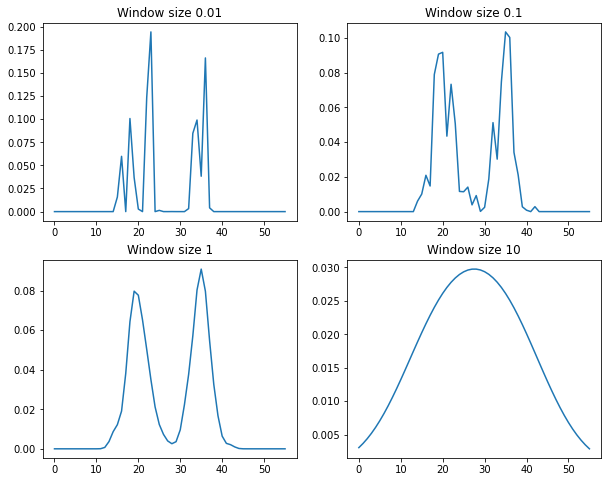

In [92]:
#Question 4:

mu1, mu2=20, 35
sigma1, sigma2= math.sqrt(5), math.sqrt(5)

parzenDis1=[np.random.normal(mu1, sigma1) for _ in range(200)]
parzenDis2=[np.random.normal(mu2, sigma2) for _ in range(200)]

window=[0.01, 0.1, 1, 10]
newValue=list(range(0, 56))



def p(a):
    return (1/math.sqrt(2*math.pi))*math.exp(-1*a**2/2)

def Parzen(x, l, h):
    n = len(l)
    
    count = 0
    for xi in l:
        count += 1/h*p((x-xi)/h)
        
    return (count/n)


l=parzenDis1+parzenDis2

plotSpot=plt.figure(figsize=(10, 8))


for i, win in enumerate(window):
    data1=[Parzen(v,l, win ) for v in newValue]
    plt.subplot(2, 2, i+1)
    plt.plot(newValue, data1)
    plt.title("Window size {}".format(win))

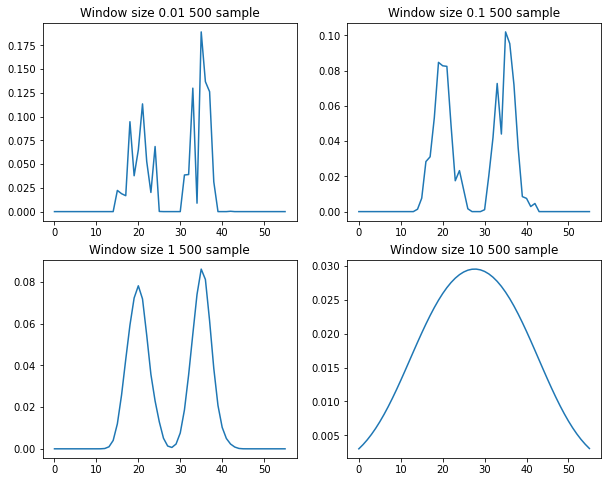

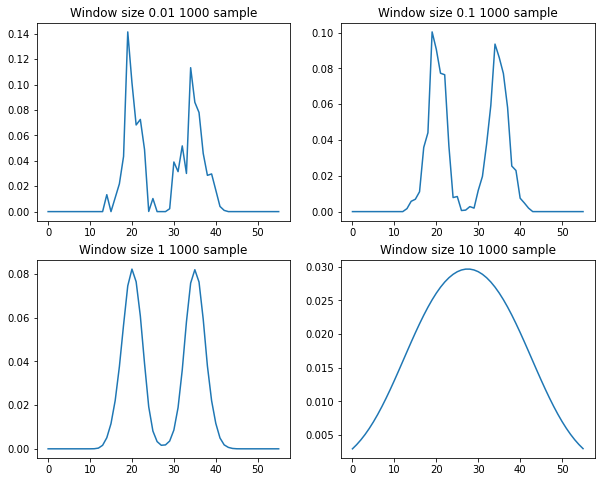

In [95]:
#Part-B

parzenDis11=[np.random.normal(mu1, sigma1) for _ in range(500)]
parzenDis22=[np.random.normal(mu2, sigma2) for _ in range(500)]

parzenDis111=[np.random.normal(mu1, sigma1) for _ in range(1000)]
parzenDis222=[np.random.normal(mu2, sigma2) for _ in range(1000)]

l1=parzenDis11+parzenDis22

plotSpot=plt.figure(figsize=(10, 8))


for i, win in enumerate(window):
    data1=[Parzen(v,l1, win ) for v in newValue]
    plt.subplot(2, 2, i+1)
    plt.plot(newValue, data1)
    plt.title("Window size {} 500 sample".format(win))


l11=parzenDis111+parzenDis222

plotSpot=plt.figure(figsize=(10, 8))


for i, win in enumerate(window):
    data1=[Parzen(v,l11, win ) for v in newValue]
    plt.subplot(2, 2, i+1)
    plt.plot(newValue, data1)
    plt.title("Window size {} 1000 sample".format(win))

Part- C

From the above plot, when h=10 the model smoothes are forms a unimodel instead of bimodal distribution. However, when
h=1 or 0.1 in 1000 samples the bimodel distribution appears to be smoother when compared with 500 sample size. 
This suggests that number of samples helps to get a smoother model. 

In [97]:
#Question-5

colnames=['x1', 'x2', 'class']
twoData=pd.read_table("http://www.cse.msu.edu/~rossarun/courses/sp21/cse802/data/hw04_data.txt", delim_whitespace=True,header=None, names=colnames)
#twoData.head()

Class1, testClass1=twoData[twoData['class']==1].head(250), twoData[twoData['class']==1].tail(250)
Class2, testClass2=twoData[twoData['class']==2].head(250), twoData[twoData['class']==2].tail(250)
Class3, testClass3=twoData[twoData['class']==3].head(250), twoData[twoData['class']==3].tail(250)



mu1 = np.array([0,0])
sigma1 = np.array([[4, 0],[0, 4]])
mu2 = np.array([10, 0])
sigma2 = np.array([[4, 0],[0, 4]])
mu3 = np.array([5, 5])
sigma3 = np.array([[5, 0],[0, 5]])


p1 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu1, sigma1) for x in testClass1.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu2, sigma2) for x in testClass1.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu3, sigma3) for x in testClass1.itertuples()]
class1Data=zip(p1, p2, p3)

p1 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu1, sigma1) for x in testClass2.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu2, sigma2) for x in testClass2.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu3, sigma3) for x in testClass2.itertuples()]
class2Data=zip(p1, p2, p3)

p1 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu1, sigma1) for x in testClass3.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu2, sigma2) for x in testClass3.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(x[1:3], mu3, sigma3) for x in testClass3.itertuples()]
class3Data=zip(p1, p2, p3)

class1, classmis1, classmis11, class2, classmis2, classmis22, class3, classmis3, classmis33=0, 0, 0, 0, 0, 0, 0, 0, 0

for i, j, k in class1Data:
    if max(i, j, k)==i:
        class1+=1
    elif max(i, j, k)==j:
        classmis1+=1
    elif max(i, j, k)==k:
        classmis11+=1
        
for i, j, k in class2Data:
    if max(i, j, k)==i:
        classmis2+=1
    elif max(i, j, k)==j:
        class2+=1
    elif max(i, j, k)==k:
        classmis22+=1
        
for i, j, k in class3Data:
    if max(i, j, k)==i:
        classmis3+=1
    elif max(i, j, k)==j:
        classmis33+=1
    elif max(i, j, k)==k:
        class3+=1     

tmp=classmis1+classmis11+classmis2+classmis22+classmis3+classmis33
tmp1=class1+classmis1+classmis11+class2+classmis2+classmis22+class3+classmis3+classmis33
errorTerm=tmp/tmp1
print("Error rate\t",errorTerm)

CM=np.array([[class1, classmis1, classmis11], [ classmis2, class2,classmis22],[ classmis3, classmis33,class3]])

print("Confusion Matrix\n",CM)

Error rate	 0.07333333333333333
Confusion Matrix
 [[230   4  16]
 [  1 235  14]
 [  9  11 230]]


In [98]:
#When the distribution is not known

mu1 = np.array([Class1["x1"].mean(), Class1["x2"].mean()])
sigma1 = np.array(Class1.drop("class", axis=1).cov())
mu2 = np.array([Class2["x1"].mean(), Class2["x2"].mean()])
sigma2 = np.array(Class2.drop("class", axis=1).cov())
mu3 = np.array([Class3["x1"].mean(), Class3["x2"].mean()])
sigma3 = np.array(Class3.drop("class", axis=1).cov())



p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) for row in testClass1.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) for row in testClass1.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) for row in testClass1.itertuples()]
class1Data=zip(p1, p2, p3)

p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) for row in testClass2.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) for row in testClass2.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) for row in testClass2.itertuples()]
class2Data=zip(p1, p2, p3)

p1 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu1, sigma1) for row in testClass3.itertuples()]
p2 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu2, sigma2) for row in testClass3.itertuples()]
p3 = [scipy.stats.multivariate_normal.pdf(row[1:3], mu3, sigma3) for row in testClass3.itertuples()]
class3Data=zip(p1, p2, p3)

class1, classmis1, classmis11, class2, classmis2, classmis22, class3, classmis3, classmis33=0, 0, 0, 0, 0, 0, 0, 0, 0

for i, j, k in class1Data:
    if max(i, j, k)==i:
        class1+=1
    elif max(i, j, k)==j:
        classmis1+=1
    elif max(i, j, k)==k:
        classmis11+=1
        
for i, j, k in class2Data:
    if max(i, j, k)==i:
        classmis2+=1
    elif max(i, j, k)==j:
        class2+=1
    elif max(i, j, k)==k:
        classmis22+=1
        
for i, j, k in class3Data:
    if max(i, j, k)==i:
        classmis3+=1
    elif max(i, j, k)==j:
        classmis33+=1
    elif max(i, j, k)==k:
        class3+=1     

tmp=classmis1+classmis11+classmis2+classmis22+classmis3+classmis33
tmp1=class1+classmis1+classmis11+class2+classmis2+classmis22+class3+classmis3+classmis33
errorTerm=tmp/tmp1
print("Error rate\t",errorTerm)

CM=np.array([[class1, classmis1, classmis11], [ classmis2, class2,classmis22],[ classmis3, classmis33,class3]])

print("Confusion Matrix\n",CM)

Error rate	 0.07466666666666667
Confusion Matrix
 [[231   4  15]
 [  1 238  11]
 [ 12  13 225]]


In [100]:
#Parzen window

def phi(u):
    return (1/math.sqrt(2*math.pi))*math.exp(-1/2*np.dot(np.transpose(u),u))

def Pn(x, l, h):
    n = len(l)
    
    total = 0
    for xi in l.iterrows():
        #tmp=np.array((x-np.array((xi[1][0], xi[1][1]))))
        total += 1/h*phi(np.array((x-np.array((xi[1][0], xi[1][1]))))/h)
        
    return total/n

Class1, testClass1=twoData[twoData['class']==1].head(250), twoData[twoData['class']==1].tail(250)
Class2, testClass2=twoData[twoData['class']==2].head(250), twoData[twoData['class']==2].tail(250)
Class3, testClass3=twoData[twoData['class']==3].head(250), twoData[twoData['class']==3].tail(250)



C1=Class1.drop("class", axis=1)
C2=Class2.drop('class', axis=1)
C3=Class3.drop('class', axis=1)

p1=[Pn(np.array((row[1][0], row[1][1])), C1, 1) for row in testClass1.drop('class', axis=1).iterrows()]
p2=[Pn(np.array((row[1][0], row[1][1])), C2, 1) for row in testClass1.drop('class', axis=1).iterrows()]
p3=[Pn(np.array((row[1][0], row[1][1])), C3, 1) for row in testClass1.drop('class', axis=1).iterrows()]

z1=zip(p1, p2, p3)


p1=[Pn(np.array((row[1][0], row[1][1])), C1, 1) for row in testClass2.drop('class', axis=1).iterrows()]
p2=[Pn(np.array((row[1][0], row[1][1])), C2, 1) for row in testClass2.drop('class', axis=1).iterrows()]
p3=[Pn(np.array((row[1][0], row[1][1])), C3, 1) for row in testClass2.drop('class', axis=1).iterrows()]

z2=zip(p1, p2, p3)

p1=[Pn(np.array((row[1][0], row[1][1])), C1, 1) for row in testClass3.drop('class', axis=1).iterrows()]
p2=[Pn(np.array((row[1][0], row[1][1])), C2, 1) for row in testClass3.drop('class', axis=1).iterrows()]
p3=[Pn(np.array((row[1][0], row[1][1])), C3, 1) for row in testClass3.drop('class', axis=1).iterrows()]

z3=zip(p1, p2, p3)

class1, classmis1, classmis11, class2, classmis2, classmis22, class3, classmis3, classmis33=0, 0, 0, 0, 0, 0, 0, 0, 0

for i, j, k in z1:
    if max(i, j, k)==i:
        class1+=1
    elif max(i, j, k)==j:
        classmis1+=1
    elif max(i, j, k)==k:
        classmis11+=1
        
for i, j, k in z2:
    if max(i, j, k)==i:
        classmis2+=1
    elif max(i, j, k)==j:
        class2+=1
    elif max(i, j, k)==k:
        classmis22+=1
        
for i, j, k in z3:
    if max(i, j, k)==i:
        classmis3+=1
    elif max(i, j, k)==j:
        classmis33+=1
    elif max(i, j, k)==k:
        class3+=1     

tmp=classmis1+classmis11+classmis2+classmis22+classmis3+classmis33
tmp1=class1+classmis1+classmis11+class2+classmis2+classmis22+class3+classmis3+classmis33
errorTerm=tmp/tmp1
print("Error term\t",errorTerm)

CM=np.array([[class1, classmis1, classmis11], [ classmis2, class2,classmis22],[ classmis3, classmis33,class3]])

print("Confusion Matrix\n",CM)



Error term	 0.076
Confusion Matrix
 [[228   5  17]
 [  1 238  11]
 [ 10  13 227]]


Describe your observations based on the error rates and confusion matrices of the 3 classifiers above.

When we compare the error rates and confusion matrices, the first model performs better with error rate 0.0733.
However when we compare the misclassification the Parzen window gives less missclassification when compare dto other model.
The number of datapoints misclassified in Parzen Window is 54, whereas in unknow distribution is 56 and known distribution is 86.



K cluster 1
Error term	 0.0
Confusion Matrix
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
K cluster 5
Error term	 0.03333333333333333
Confusion Matrix
 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
K cluster 10
Error term	 0.02
Confusion Matrix
 [[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
K cluster 15
Error term	 0.013333333333333334
Confusion Matrix
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
K cluster 20
Error term	 0.02
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
K cluster 25
Error term	 0.02
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
K cluster 30
Error term	 0.04666666666666667
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
K cluster 35
Error term	 0.04
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
K cluster 40
Error term	 0.04666666666666667
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]
K cluster 45
Error term	 0.05333333333333334
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  6 44]]
K cluster 50
Error term	 0.06
Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0 

Text(0.5, 1.0, 'KNN with accuracy')

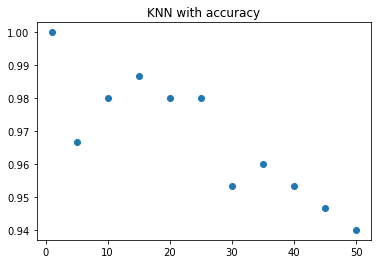

In [114]:
#Question-6
from scipy import spatial

colnames=['x1', 'x2', 'x3', 'x4', 'class']
irisData=pd.read_table("http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/iris_data.txt", header=None, delim_whitespace=True, names=colnames)
Class1, testClass1=irisData[irisData['class']==1].head(250), irisData[irisData['class']==1].tail(250)
Class2, testClass2=irisData[irisData['class']==2].head(250), irisData[irisData['class']==2].tail(250)
Class3, testClass3=irisData[irisData['class']==3].head(250), irisData[irisData['class']==3].tail(250)
train=[Class1, Class2, Class3]
test=[testClass1, testClass2, testClass3]

trainDataset=pd.concat(train)
testDataset=pd.concat(test)
label=[x[1][4] for x in testDataset.iterrows()]
kclus=[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
accuracy=[]

for i, k in enumerate(kclus):
    predit=[]
    for t in testDataset.iterrows():
        knear=[]
        p=None
        t1, t2, t3, t4=t[1][0], t[1][1], t[1][2], t[1][3]
        for tr in trainDataset.iterrows():
            tt1, tt2, tt3, tt4=tr[1][0], tr[1][1], tr[1][2], tr[1][3]
            distance=spatial.distance.euclidean(np.array(tr[1][:-1]), np.array(t[1][:-1]))
            p=tr[1][4]
            if len(knear) < k:
                knear.append((distance, p))
            else:
                if distance<knear[-1][0]:
                    knear[-1]=(distance, p)
            knear.sort()
            
        kclass=[cl for d, cl in knear]
        predit.append(np.bincount(kclass).argmax())
    class1, classmis1, classmis11, class2, classmis2, classmis22, class3, classmis3, classmis33=0, 0, 0, 0, 0, 0, 0, 0, 0


    for i, j in zip(label, predit):
        if i==1:
            if j==1:
                class1+=1
            elif j==2:
                classmis1+=1
            elif j==3:
                classmis11+=1
                    
        if i==2:
            if j==1:
                classmis2+=1
            elif j==2:
                class2+=1
            elif j==3:
                classmis22+=1
                    
        if i==3:
            if j==1:
                classmis3+=1
            elif j==2:
                classmis33+=1
            elif j==3:
                class3+=1
    tmp=classmis1+classmis11+classmis2+classmis22+classmis3+classmis33
    tmp1=class1+classmis1+classmis11+class2+classmis2+classmis22+class3+classmis3+classmis33
    errorTerm=tmp/tmp1
    print("K cluster", k)
    print("Error term\t",errorTerm)
    accuracy.append(1-errorTerm)
    CM=np.array([[class1, classmis1, classmis11], [ classmis2, class2,classmis22],[ classmis3, classmis33,class3]])

    print("Confusion Matrix\n",CM)
    

plt.scatter(kclus, accuracy)
plt.title('KNN with accuracy')

The accuracy until 20 K increased after whicth the accracy decreased with
K. In the above plot when K=1 the accuracy is highest compared to other
K values. 